In [5]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

from skimage import data
from skimage.util import img_as_float
from skimage.feature import (corner_harris, corner_subpix, corner_peaks,
                             plot_matches)
from skimage.transform import warp, AffineTransform
from skimage.exposure import rescale_intensity
from skimage.color import rgb2gray
from skimage.measure import ransac

%matplotlib inline


In [6]:
# generate synthetic checkerboard image and add gradient for the later matching
checkerboard = img_as_float(data.checkerboard())
img_orig = np.zeros(list(checkerboard.shape) + [3])
img_orig[..., 0] = checkerboard
gradient_r, gradient_c = (np.mgrid[0:img_orig.shape[0],
                                   0:img_orig.shape[1]]
                          / float(img_orig.shape[0]))

img_orig[..., 1] = gradient_r
img_orig[..., 2] = gradient_c
img_orig_gray = rgb2gray(img_orig * 255.0)

img_orig_gray = img_orig_gray.astype(np.uint8)


In [1]:
# warp synthetic image
tform = AffineTransform(rotation=10 *  np.pi/180)
img_warped_gray = warp(img_orig_gray, tform.inverse, output_shape=(200, 200)) * 255.0
img_warped_gray = img_warped_gray.astype(np.uint8)

f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img_orig_gray, cmap='gray')
ax[1].imshow(img_warped_gray, cmap='gray')
plt.show()

NameError: name 'AffineTransform' is not defined

Rotation angle in degress 
-10.9598214337


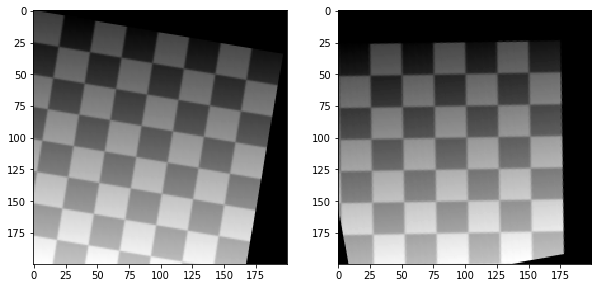

In [30]:
sz = img_orig_gray.shape
warp_mode = cv2.MOTION_EUCLIDEAN

if warp_mode == cv2.MOTION_HOMOGRAPHY:
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    

number_of_iterations = 5000
termination_eps = 1e-10

criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (img_orig_gray, img_warped_gray, warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    im2_aligned = cv2.warpPerspective (img_warped_gray, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(img_warped_gray, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);

sin = warp_matrix[0, 1]
cos = warp_matrix[0, 0]

print ("Rotation angle in degress ")
print (np.arctan2(sin, cos) * 180.0 / np.pi)
# Show final results
f, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(img_warped_gray, cmap='gray')
ax[1].imshow(im2_aligned, cmap='gray')

plt.show()